In [23]:
import drawSvg as draw
import yaml
from shapely.geometry import Polygon,Point
import matplotlib.pyplot as plt
import random

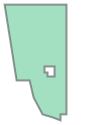

In [28]:
data = yaml.safe_load(open("sanglier_terrain1.yml"))
outline = [(p[0],p[1]) for p in data['geometry']['outline']]
holes = [[(p[0],p[1]) for p in hole] for hole in data['geometry']['holes']]
polygon = Polygon(outline, holes)
polygon

In [29]:
# Distribute all trees
tree_list=[]
range_x = (polygon.bounds[0],polygon.bounds[2])
range_y = (polygon.bounds[1],polygon.bounds[3])
distance_min = data['params']['distance_min']

for index_type,tree_type in enumerate(data['trees']):
    for i in range(0,tree_type['count']):
        tree_placed = False
        max_tries = 1e6
        nb_tries = 0
        while not tree_placed and nb_tries < max_tries:
            point = (random.uniform(*range_x), random.uniform(*range_y))
            if polygon.contains(Point(*point)):
                tree_placed = True
                for existing_tree in tree_list:
                    if Point(*point).distance(Point(*existing_tree['position'])) < distance_min:
                        tree_placed = False
                        break
            if tree_placed:
                tree_list.append({'type':index_type,'position':point})
            nb_tries += 1
            
        if max_tries <= nb_tries:
            raise("Failed to placed tree !")
            
            
tree_list

[{'type': 0, 'position': (49.55211076198842, 38.569827071874826)},
 {'type': 0, 'position': (57.233665912012185, 98.76296804290534)},
 {'type': 0, 'position': (28.710568801076043, 34.127369538652765)},
 {'type': 0, 'position': (42.6102098559239, 14.072603290211529)},
 {'type': 0, 'position': (51.07644484229947, 14.066682415996302)},
 {'type': 0, 'position': (41.00444546800689, 70.73062129286122)},
 {'type': 0, 'position': (49.05726384799032, 32.45725813007689)},
 {'type': 0, 'position': (32.80893445856457, 51.38527637254241)},
 {'type': 0, 'position': (37.62350425798673, 27.60230020308475)},
 {'type': 0, 'position': (36.618469111711484, 16.66060137279839)},
 {'type': 0, 'position': (9.045133293518623, 61.13328403392316)},
 {'type': 0, 'position': (57.966048168114625, 102.56490847861919)},
 {'type': 0, 'position': (17.666553400443355, 67.33132875245565)},
 {'type': 0, 'position': (32.32508399031147, 114.06249381072018)},
 {'type': 0, 'position': (56.147784431977065, 41.52715217919013)},

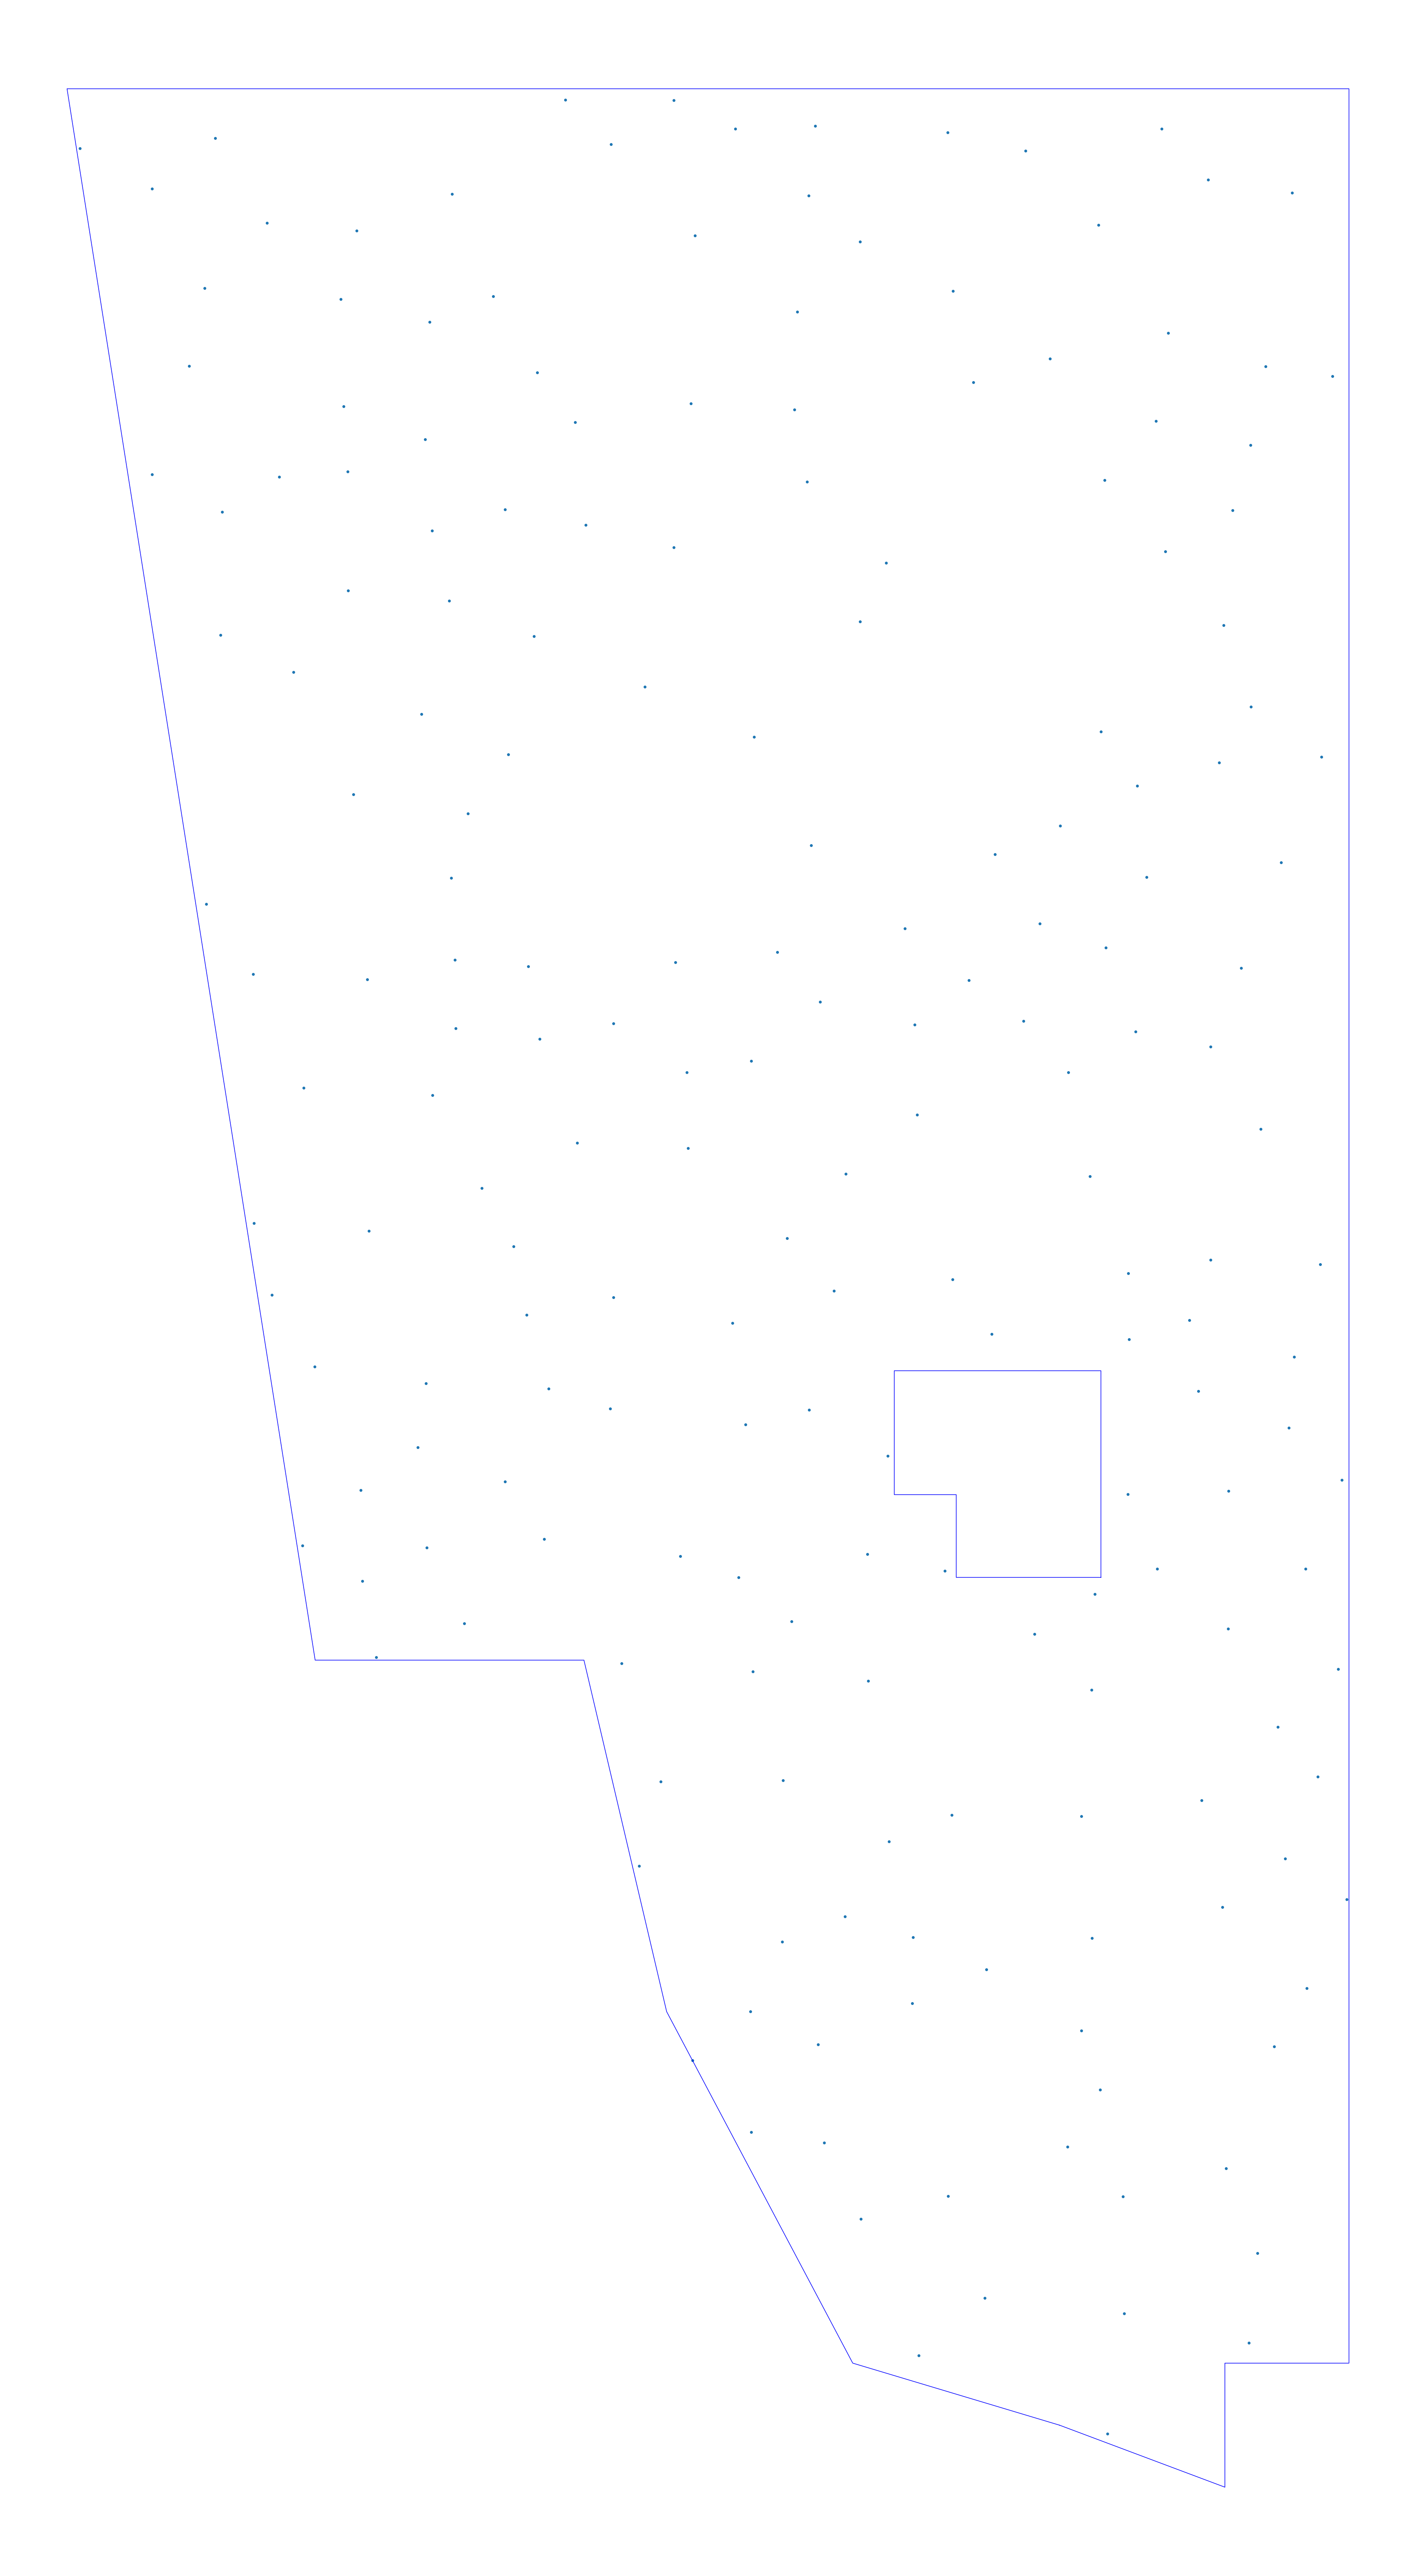

In [34]:
x,y = polygon.exterior.xy
tree_positions_x = [p['position'][0] for p in tree_list]
tree_positions_y = [p['position'][1] for p in tree_list]
plt.figure(figsize=[polygon.bounds[2], polygon.bounds[3]])
plt.axis('equal')
plt.axis('off')
plt.plot(*polygon.exterior.xy,color="blue")
for i in polygon.interiors:
    plt.plot(*i.xy,color="blue")
plt.scatter(tree_positions_x,tree_positions_y)
    
    

In [81]:
drawing = draw.Drawing(polygon.bounds[2], polygon.bounds[3], origin=(0,0), displayInline=False)
polygon.exterior.coords.xy
draw.Lines()

(array('d', [48.0, 38.0, 29.0, 25.0, 12.0, 0.0, 62.0, 62.0, 56.0, 56.0, 48.0]),
 array('d', [3.0, 6.0, 23.0, 40.0, 40.0, 116.0, 116.0, 6.0, 6.0, 0.0, 3.0]))

In [74]:


# Draw an irregular polygon
d.append(draw.Lines(polygon.exterior.,
                    close=False,
            fill='transparent',
            stroke='black'))
d

TypeError: __init__() missing 1 required positional argument: 'sy'

In [60]:
d